In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import pdb
from scipy import stats
import soundfile as sf 
import librosa
import math
import os
import sklearn as sk
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

C:\Users\ankur\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
protocols = "C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/labels"
pro_list = os.listdir(protocols)

files = "C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals"
file_list = os.listdir(files)

In [3]:
l = len(file_list) # number of samples in the dataset
ts = int(0.8 * l)  # number of training sampls
vs = l - ts  # number of validation samples

In [4]:
arr = np.arange(l) 
np.random.seed(0)
np.random.shuffle(arr)  # shuffling of the array

train_idx = arr[:ts]  # training indices
test_idx = arr[ts:]   # testing indices

In [5]:
len(train_idx) # number of training samples

1025

In [6]:
len(train_idx) # number of training samples

1025

In [7]:
# function to extract the features from non-gulp region for training/testing indices

def nongulp_feats(idx):
    fs = 4000
    feats = []
    
    for i in range(len(idx)):
        a1 = pd.read_csv(os.path.join(protocols,pro_list[idx[i]])) 
        fname = os.path.join(files, file_list[idx[i]])
        s1 = np.load(fname)[:,0]
    
        for j in range(len(a1)+1):
            
            if len(a1) == 0:
                break

            elif j == 0:
                st1 = 0
                # pdb.set_trace()
                sp1 = a1['start'][0]
                # pdb.set_trace()
                s2 = s1[st1:sp1]
            elif j < len(a1):
                st1 = a1['end'][j-1]
                sp1 = a1['start'][j]
                # pdb.set_trace()
                s2 = s1[st1:sp1]
            else:
                st1 = a1['end'][j-1]
                # pdb.set_trace()
                s2 = s1[st1:]
            stat = librosa.feature.mfcc(s2, sr = fs, n_mfcc = 20, n_mels = 40, n_fft = 512, hop_length = 20, win_length = 200) 
            feats.append(stat)
            
    return feats

In [8]:
# function to extract the features from gulp region for training/testing indices

def gulp_feats(idx):   
    fs = 4000
    feats = []
    for i in range(len(idx)):
    # for i in range(10):
        a = pd.read_csv(os.path.join(protocols,pro_list[idx[i]]))
        fname = os.path.join(files, file_list[idx[i]])
        s = np.load(fname)[:,0]

        for j in range(len(a)):
            st1 = a['start'][j]
            sp1 = a['end'][j]
            s1 = s[st1:sp1]
            # pdb.set_trace()
            stat = librosa.feature.mfcc(s1, sr = fs, n_mfcc = 20, n_mels = 40, n_fft = 512, hop_length = 20, win_length = 200) 
            feats.append(stat)

    return feats

In [9]:
gulp_feats_train = gulp_feats(train_idx)
gulp_feats_train_con = np.hstack(gulp_feats_train)   # gulp feature sets for training

nongulp_feats_train1 = nongulp_feats(train_idx[:int(len(train_idx)/2)])
nongulp_feats_train_con1 = np.hstack(nongulp_feats_train1)  # non-gulp feature set1 for training
 
nongulp_feats_train2 = nongulp_feats(train_idx[int(len(train_idx)/2):])
nongulp_feats_train_con2 = np.hstack(nongulp_feats_train2)   # non-gulp feature set2 for training

# warnings.filterwarnings('ignore')
# nongulp_feats_train2 = nongulp_feats(train_idx)
# nongulp_feats_train_con1 = np.hstack(nongulp_feats_train1)

In [10]:
print(gulp_feats_train_con.shape)
print(nongulp_feats_train_con1.shape)

(20, 4829)
(20, 827877)


In [11]:
# GMM for gulp sounds
gmm_gulp = GaussianMixture(n_components=16, random_state=None, covariance_type='diag', max_iter=50, verbose=2,
                              verbose_interval=1).fit(gulp_feats_train_con.T)

# GMM for nongulp sounds
gmm_nongulp1 = GaussianMixture(n_components=16, random_state=None, covariance_type='diag', max_iter=50, verbose=2,
                              verbose_interval=1).fit(nongulp_feats_train_con1.T)

gmm_nongulp2 = GaussianMixture(n_components=16, random_state=None, covariance_type='diag', max_iter=50, verbose=2,
                              verbose_interval=1, weights_init = gmm_nongulp1.weights_, 
                              means_init = gmm_nongulp1.means_, precisions_init = gmm_nongulp1.precisions_).fit(nongulp_feats_train_con2.T)

Initialization 0
  Iteration 1	 time lapse 0.17274s	 ll change inf
  Iteration 2	 time lapse 0.00807s	 ll change 1.77555
  Iteration 3	 time lapse 0.00800s	 ll change 0.79043
  Iteration 4	 time lapse 0.00412s	 ll change 0.18653
  Iteration 5	 time lapse 0.01107s	 ll change 0.04156
  Iteration 6	 time lapse 0.00519s	 ll change 0.02230
  Iteration 7	 time lapse 0.00803s	 ll change 0.01624
  Iteration 8	 time lapse 0.00801s	 ll change 0.01214
  Iteration 9	 time lapse 0.00799s	 ll change 0.00891
  Iteration 10	 time lapse 0.00401s	 ll change 0.00703
  Iteration 11	 time lapse 0.00799s	 ll change 0.00839
  Iteration 12	 time lapse 0.00800s	 ll change 0.00779
  Iteration 13	 time lapse 0.00400s	 ll change 0.00679
  Iteration 14	 time lapse 0.00800s	 ll change 0.00637
  Iteration 15	 time lapse 0.00800s	 ll change 0.00546
  Iteration 16	 time lapse 0.00800s	 ll change 0.00471
  Iteration 17	 time lapse 0.00400s	 ll change 0.00478
  Iteration 18	 time lapse 0.00811s	 ll change 0.00656
  Iter

In [18]:
import pickle
with open('gmm_mfcc_static_gulp.pkl', 'wb') as f:
    pickle.dump(gmm_gulp, f)
    
with open('gmm_mfcc_static_nongulp.pkl', 'wb') as f:
    pickle.dump(gmm_nongulp2, f)
    

In [12]:
# feature sets of gulp region for testing samples
gulp_feats_test = gulp_feats(test_idx)

# feature sets of non-gulp region for testing samples
nongulp_feats_test = nongulp_feats(test_idx)

In [13]:
print(len(gulp_feats_test))
print(len(nongulp_feats_test))

348
560


In [14]:
# function to compute true positives and false negatives
def true_positives(gulp_feats_test):   
    scores = [] 
    preds = []
    P = len(gulp_feats_test)

    for i in range(len(gulp_feats_test)):
        gulp_feat = gulp_feats_test[i]

        s1 = gmm_gulp.score_samples(gulp_feat.T)
        s2 = gmm_nongulp2.score_samples(gulp_feat.T)
        scr = np.mean(s1 - s2)
        scores.append(scr)

        if scr >= 0:
            pred = 1
        else:
            pred = 0

        preds.append(pred)
        
    tp = np.sum(np.equal(preds,1))   # true positives
    fn = P - tp    # false negatives
    
    return P, tp, fn

In [15]:
# function to compute true negatives and false positives
def true_negatives(nongulp_feats_test):   
    scores = [] 
    preds = []
    N = len(nongulp_feats_test)

    for i in range(len(nongulp_feats_test)):
        nongulp_feat = nongulp_feats_test[i]

        s1 = gmm_gulp.score_samples(nongulp_feat.T)
        s2 = gmm_nongulp2.score_samples(nongulp_feat.T)
        scr = np.mean(s1 - s2)
        scores.append(scr)

        if scr >= 0:
            pred = 1
        else:
            pred = 0

        preds.append(pred)
        
    tn = np.sum(np.equal(preds,0))   # true negatives
    fp = N - tn    # false positives
    
    return N, tn, fp

In [16]:
# total number of positives, true positives, false negatives
P, tp, fn = true_positives(gulp_feats_test)

In [17]:
# total number of negatives, true negatives, false positives
N, tn, fp = true_negatives(nongulp_feats_test)

In [117]:
# function to compute accuracy
def metric_acc(P, tp, N, tn):
    acc = (tp + tn) * 100 /(P+N)
    return acc

In [118]:
metric_acc(P, tp, N, tn)

73.568281938326

In [119]:
print(P, tp, fn)
print(N, tn, fp)

348 302 46
560 366 194


In [120]:
# read the .mp3 file which is downloaded recently from S3 and .csv file

import librosa
s1_path = "C:/Users/ankur/OneDrive/Desktop/bib_project/real_samples_baby/1_20230302113313_2033_SDR_1.mp3"
s1, sr = librosa.load(s1_path, sr=4000)

s1_path_csv = "C:/Users/ankur/OneDrive/Desktop/bib_project/real_samples_baby/2033.csv"
a = pd.read_csv(s1_path_csv).values

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
# Extract features for gulp regions

import math
gulp_feats_test = []
gulp_sig_seg = []

for i, (st, sp) in enumerate(a):
    # print(i, st, sp)
    t1 = range(math.floor(st * sr),  math.floor(sp * sr))
    gulp_sig_seg = s1[t1]

    # sig_segs.append(sig_seg)
    # print(sig_seg.shape)
    stat = librosa.feature.mfcc(gulp_sig_seg, sr = sr, n_mfcc = 20, n_mels = 40)  # win_length = 960, hop_length = 480
    gulp_feats_test.append(stat) 

In [124]:
len(gulp_feats_test)

5

In [125]:
gulp_feats_test[0].shape

(20, 3)

In [126]:
len(a)

5

In [127]:
# Extract features for non-gulp regions

nongulp_feats_test = []
nongulp_sig_seg = []

for i, (st1, sp1) in enumerate(a):
    if i == 0:
      # st2, sp2 = a[i]
      t1 = range(0, math.floor(st1 * sr))
      # print(t1)
      sig_seg = s1[t1]
      stat = librosa.feature.mfcc(sig_seg, sr = sr, n_mfcc = 20, n_mels = 40)  
      nongulp_feats_test.append(stat)
      
    if i < len(a) - 1:
      j = i + 1
      st2, sp2 = a[j]
      t1 = range(math.floor(sp1 * sr), math.floor(st2 * sr))
      # print(t1)
      sig_seg = s1[t1]
      stat = librosa.feature.mfcc(sig_seg, sr = sr, n_mfcc = 20, n_mels = 40)
      nongulp_feats_test.append(stat)
        
    if i == len(a) - 1:
      t1 = math.floor(sp1 * sr)
      # print(t1)
      sig_seg = s1[t1+1:]
      stat = librosa.feature.mfcc(sig_seg, sr = sr, n_mfcc = 20, n_mels = 40)
      nongulp_feats_test.append(stat)
      

In [128]:
# Compute accuracy for recently uploaded file

P, tp, fn = true_positives(gulp_feats_test)
N, tn, fp = true_negatives(nongulp_feats_test)

print(metric_acc(P, tp, N, tn))

print(P, tp, fn)
print(N, tn, fp)

5 0 5
6 6 0


In [90]:
t1 = range(0, math.floor(a[0,0] * sr))
print(t1)

range(0, 30360)


In [89]:
stat = librosa.feature.mfcc(s1, sr = sr, n_mfcc = 20, n_mels = 40, n_fft = 512, hop_length = 20, win_length = 200)

sc1 = gmm_gulp.score_samples(stat.T)
sc2 = gmm_nongulp2.score_samples(stat.T)
scr = sc1 - sc2
# scores.append(scr)

NameError: name 'gmm_gulp' is not defined

In [23]:
# len(scr)

5551

In [32]:
# print(scr.max()), print(scr.min())

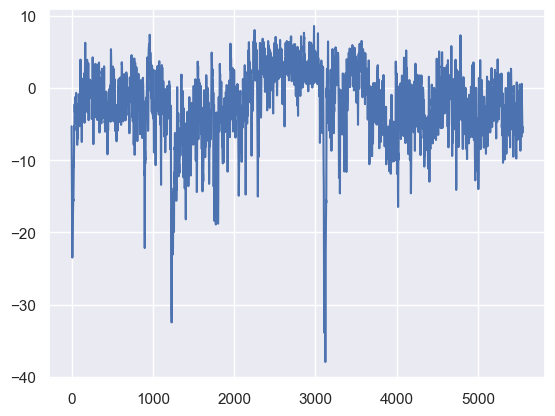

In [33]:
plt.plot(scr)

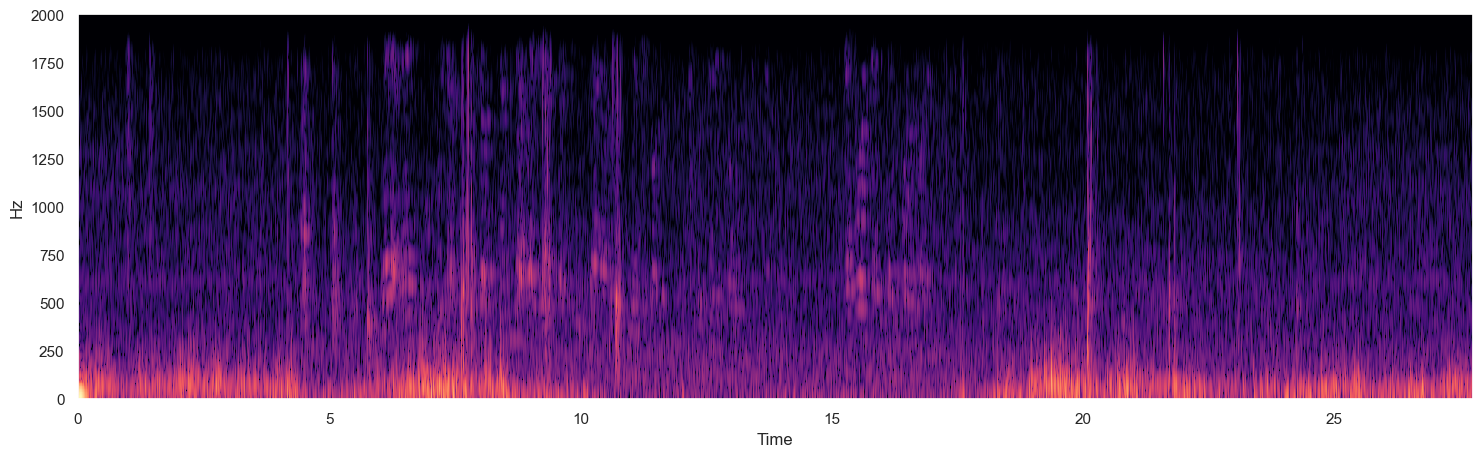

In [34]:
from librosa import display

nfft = 1024
hop = 40
win_len = 80

f1_spec_wav = librosa.amplitude_to_db(np.abs(librosa.stft(s1, n_fft=nfft, hop_length = hop, win_length = win_len)))

fig = plt.figure(figsize = (18,5))
display.specshow(f1_spec_wav, sr=sr, hop_length=hop, x_axis = 'time', y_axis = 'linear')

# Regression Model

In [29]:
import random

# Generate a random float in the range of 10 to 20
random_float = random.uniform(10, 20)

print(random_float)

14.89954160911786


In [30]:
import pandas as pd
import random

# create an empty DataFrame with the specified columns
df = pd.DataFrame(columns=['duration', 'number of gulps', 'gender', 'weight', 'age in months', 'milk consumed'])

# populate the DataFrame with random values
for i in range(50):
    duration = round(random.uniform(10, 20), 2)
    num_gulps = random.randint(120, 350)
    gender = random.randint(0, 1)
    weight = round(random.uniform(3, 8), 2)
    age = random.randint(0, 12)
    milk_consumed = round(random.uniform(50, 250), 2)
    
    # add a new row to the DataFrame
    df.loc[i] = [duration, num_gulps, gender, weight, age, milk_consumed]

# display the DataFrame
print(df)

    duration  number of gulps  gender  weight  age in months  milk consumed
0      10.96            257.0     1.0    4.57            8.0         201.81
1      14.89            261.0     1.0    5.89            0.0          98.19
2      12.69            224.0     1.0    3.08            0.0         237.43
3      12.34            266.0     0.0    5.29           10.0         193.01
4      18.55            122.0     1.0    3.28            2.0         182.66
5      16.46            301.0     0.0    6.96            7.0         105.87
6      18.70            263.0     0.0    7.17            9.0         185.27
7      11.42            126.0     0.0    6.62            9.0         225.25
8      10.54            272.0     0.0    4.79            5.0         114.88
9      14.22            215.0     0.0    7.71            5.0         156.56
10     11.20            149.0     1.0    6.43            8.0         182.84
11     14.91            162.0     0.0    3.79            9.0          99.17
12     18.26

In [31]:
import torch
import torch.nn as nn
import pandas as pd

# define the model architecture
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out

# create a neural network instance
model = NeuralNet(input_size=5, hidden_size=64, output_size=1)

# specify loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# prepare input and output variables
X = df.iloc[:50, :5].values
y = df.iloc[:50, 5:].values

# convert numpy arrays to tensors
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype=torch.float32)

# train the model
num_epochs = 1000

for epoch in range(num_epochs):
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# save the trained model
torch.save(model.state_dict(), 'model_weights.pth')


Epoch [100/1000], Loss: 3852.1619
Epoch [200/1000], Loss: 2741.8716
Epoch [300/1000], Loss: 2639.7727
Epoch [400/1000], Loss: 2577.6304
Epoch [500/1000], Loss: 2538.0623
Epoch [600/1000], Loss: 2504.8098
Epoch [700/1000], Loss: 2469.2183
Epoch [800/1000], Loss: 2430.1230
Epoch [900/1000], Loss: 2390.2781
Epoch [1000/1000], Loss: 2359.7725


In [ ]:
test_sample = [10.96, 257.0, 1.0. 4.57, 8.0]